# Import Scikit-Learn, Pandas and Numpy

In [4]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve, average_precision_score

from scipy.stats import norm, skew

# 1. Import Training Data and Testing using Pandas

In [5]:
train = pd.read_csv('/content/sample_data/creditcard.csv')

FileNotFoundError: ignored

In [3]:
train.head(5)

NameError: ignored

# 2. Exploratory Data Analysis

### Explore missing data

In [4]:
train_nulls = (train.isnull().sum() / len(train)) * 100
train_nulls = train_nulls[train_nulls > 0]
missing_data_train = pd.DataFrame({'Missing Ratio %' :train_nulls}).sort_values(
    'Missing Ratio %', ascending=False)
missing_data_train

,Missing Ratio %
V4,0.00052
V18,0.00052
Amount,0.00052
V28,0.00052
V27,0.00052
V26,0.00052
V25,0.00052
V24,0.00052
V23,0.00052
V22,0.00052


In [5]:
train.info() # Check training Dataset datatypes and info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192217 entries, 0 to 192216
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    192217 non-null  float64
 1   V1      192217 non-null  float64
 2   V2      192217 non-null  float64
 3   V3      192217 non-null  float64
 4   V4      192216 non-null  float64
 5   V5      192216 non-null  float64
 6   V6      192216 non-null  float64
 7   V7      192216 non-null  float64
 8   V8      192216 non-null  float64
 9   V9      192216 non-null  float64
 10  V10     192216 non-null  float64
 11  V11     192216 non-null  float64
 12  V12     192216 non-null  float64
 13  V13     192216 non-null  float64
 14  V14     192216 non-null  float64
 15  V15     192216 non-null  float64
 16  V16     192216 non-null  float64
 17  V17     192216 non-null  float64
 18  V18     192216 non-null  float64
 19  V19     192216 non-null  float64
 20  V20     192216 non-null  float64
 21  V21     19

### Explore numeric features' statistics

In [6]:
train.describe() # Training Dataset Statistics

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,192217.000000,192217.000000,192217.000000,192217.000000,192216.000000,192216.000000,192216.000000,192216.000000,192216.000000,192216.000000,192216.000000,192216.000000,192216.000000,192216.000000,192216.000000,192216.000000,192216.000000,192216.000000,192216.000000,192216.000000,192216.000000,192216.000000,192216.000000,192216.000000,192216.000000,192216.000000,192216.000000,192216.000000,192216.000000,192216.000000,192216.000000
mean,68184.073844,-0.119304,0.008753,0.359554,0.084969,-0.127450,0.049838,-0.058504,0.021476,0.011041,-0.014620,0.141557,-0.076435,0.042804,0.057877,0.094240,-0.005790,0.029760,-0.039552,-0.014499,0.022351,-0.017208,-0.056032,-0.017506,0.005145,0.068107,0.007595,0.001424,0.002022,89.397676,0.001961
std,33047.933474,1.886963,1.621254,1.436355,1.394042,1.357811,1.307049,1.214081,1.212196,1.139364,1.092522,1.042836,1.105301,1.035911,0.973461,0.947030,0.886208,0.896355,0.839023,0.818372,0.744284,0.737950,0.686028,0.606937,0.602864,0.485046,0.489193,0.394217,0.311641,248.537763,0.044244
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-22.838548,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,43474.000000,-0.967140,-0.574871,-0.270972,-0.782560,-0.795149,-0.705420,-0.579568,-0.176691,-0.662887,-0.518281,-0.614648,-0.488013,-0.638819,-0.359076,-0.496639,-0.476049,-0.436124,-0.521809,-0.492089,-0.191433,-0.227730,-0.539925,-0.169066,-0.339835,-0.230686,-0.331176,-0.066996,-0.039228,5.990000,0.000000
50%,65611.000000,-0.108100,0.085438,0.523250,0.086367,-0.183411,-0.214153,-0.016194,0.046201,-0.074982,-0.102227,0.078480,0.111970,0.015369,0.078760,0.191374,0.063046,-0.029737,-0.041538,-0.015230,-0.042312,-0.045364,-0.041929,-0.030534,0.054035,0.111705,-0.060694,0.006586,0.019058,22.860000,0.000000
75%,85905.000000,1.205997,0.785142,1.241678,0.900682,0.443670,0.446486,0.490727,0.340965,0.629582,0.436465,0.927258,0.612962,0.716261,0.516261,0.784365,0.530348,0.424510,0.451171,0.469953,0.151471,0.145970,0.409595,0.111459,0.420350,0.387973,0.264035,0.089142,0.078123,79.000000,0.000000
max,129594.000000,2.439207,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,23.745136,12.018913,7.848392,4.569009,10.526766,5.784514,6.098529,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


### Explore features' distributions

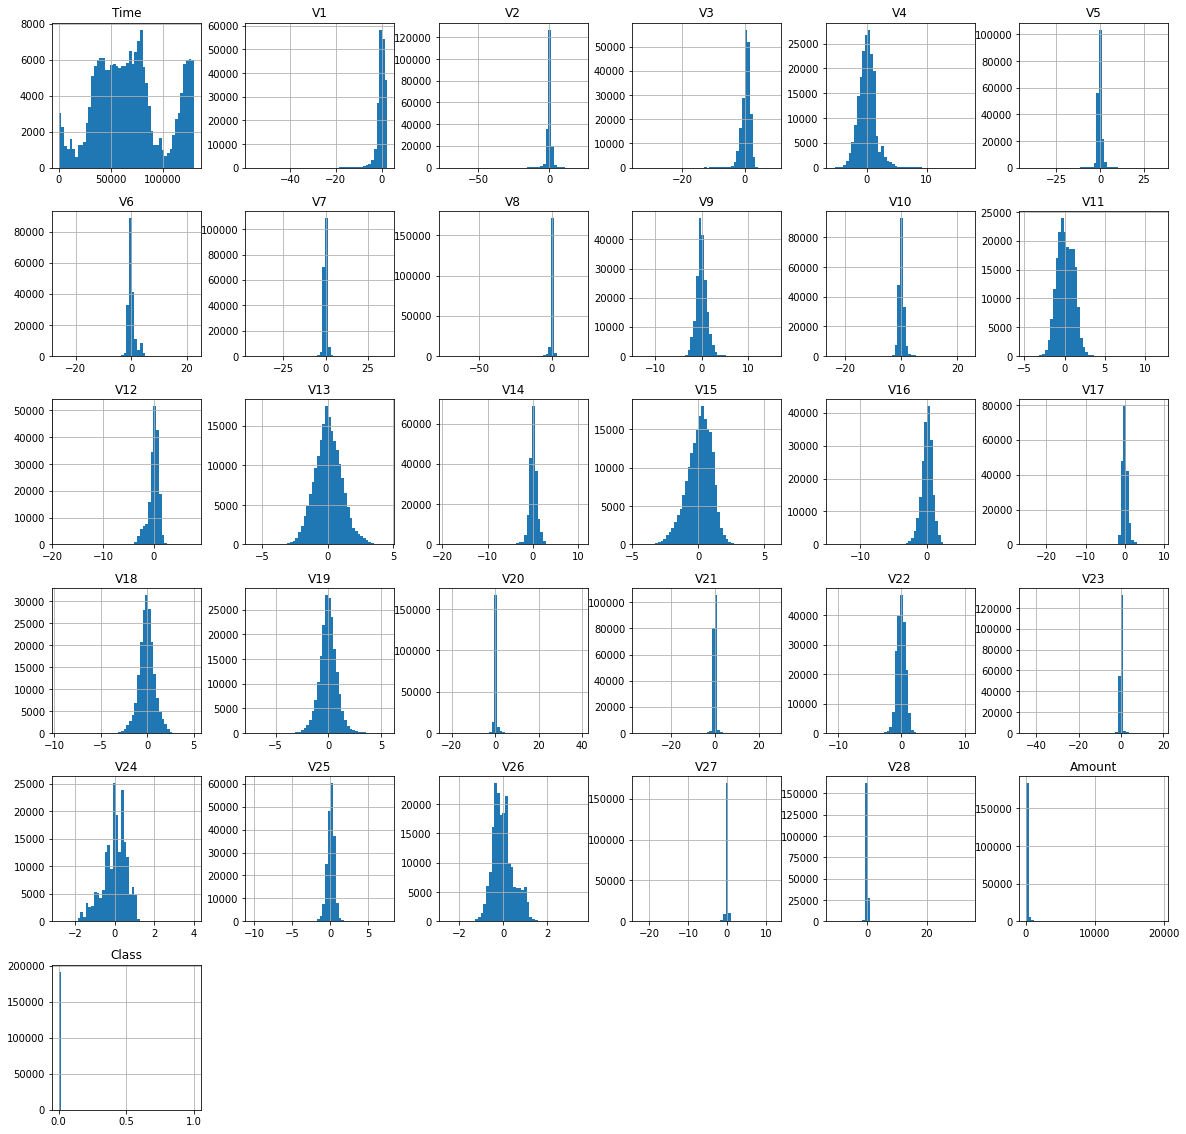

In [7]:
train.hist(bins=50, figsize=(20,20))
plt.show()

### Analyzing target variable

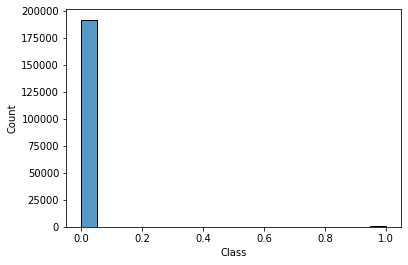

In [8]:
sns.histplot(train['Class']) # Unbalanced Data

In [9]:
train['Class'].value_counts()

0.0    191839
1.0       377
Name: Class, dtype: int64

# 3. Data Preprocessing

In [10]:
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


### Extract numerical and categorical features (nominal and ordinal)

In [11]:
numerical_features = [x for x in train.select_dtypes(include='number').columns if x not in ['Class']]
categorical_features = train.select_dtypes(exclude='number').columns.tolist()
label = ['Class']

# 4. Train-Validation split

In [12]:
train_df, val_df = train_test_split(train, test_size=0.1, random_state=42)

X_train = train_df.drop(columns=label)
y_train = train_df[label]

X_val = val_df.drop(columns=label[0])
y_val = val_df[label]

features = [X_train.columns]

# 5. Modelling

In [13]:
# Random Forest Classifier
model = Pipeline(
    steps=[
        ('Standard_Scalar', StandardScaler()),
        ('Classifier', RandomForestClassifier(max_depth=5, class_weight='balanced'))
    ])

In [16]:
model.fit(X_train, np.ravel(y_train))

set_config(display='diagram')
model

ValueError: ignored

In [ ]:
y_pred = model.predict(X_val)
print('Classification report:\n\n{}'.format(
    classification_report(y_val, y_pred))
)

In [ ]:
disp = plot_precision_recall_curve(model, X_val, y_val)

disp.ax_.set_title('Two-class Precision-Recall curve')

In [ ]:
disp = plot_roc_curve(model, X_val, y_val)
disp.ax_.set_title('Two-class ROC curve')